<h1>Import bibliotek</h1>

In [226]:
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import spearmanr
import numpy as np
from scipy.stats import levene
import matplotlib.pyplot as plt

In [227]:
df = pd.read_csv("diabetes.csv")

In [228]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<p style="font-size: 20px;"> Baza danych zawiera informację o osobach pod kątem cukrzycy. Kolejne kolumny zawierają następujące informację:</p>
<ul>
    <li>Pregnancies	- ilość ciąży</li>
    <li>Glucose - stężenie glukozy w osoczu</li>
    <li>BloodPressure - ciśnienie krwi(mmHg)</li>
    <li>SkinThickness - grubość skóry(mm)</li>
    <li>Insulin	- insulina(mU/ml)</li>
    <li>BMI - indeks masy ciała</li>
    <li>DiabetesPedigreeFunction - funkcja oceniająca prawdopodobieństwo cukrzycy na podstawie historii rodziny</li>
    <li>Age - wiek</li>
    <li>Outcome - wartości 1(chory na cukrzycę) lub 0(zdrowy)</li>
</ul>

In [229]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h1>Usunięcie wierszy, w których wartości wynoszą 0(poza takimi gdzie wartość 0 nie oznacza braku informacji).</h1>

In [230]:
df = df[(df['Glucose'] != 0) & (df['BloodPressure'] != 0) & (df['SkinThickness'] != 0) & (df['Insulin'] != 0) & (df['BMI'] != 0)]

In [231]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [232]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [233]:
def normality_plots(data):
    for i in range(data.shape[1] - 1):
        column_name = data.columns[i]
        plt.hist(data[column_name], bins=30, color='lightgreen', edgecolor='black')
        plt.title(f'Histogram - {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.show()

<h1>Sprawdzenie normalności zmiennych</h1>

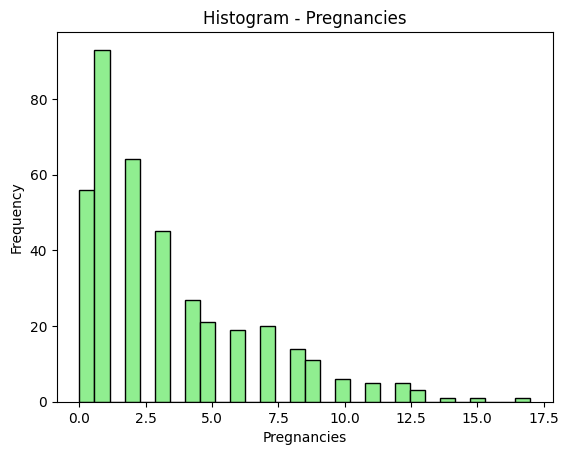

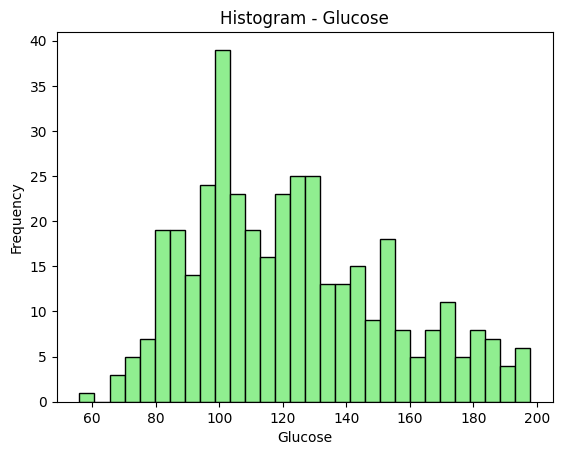

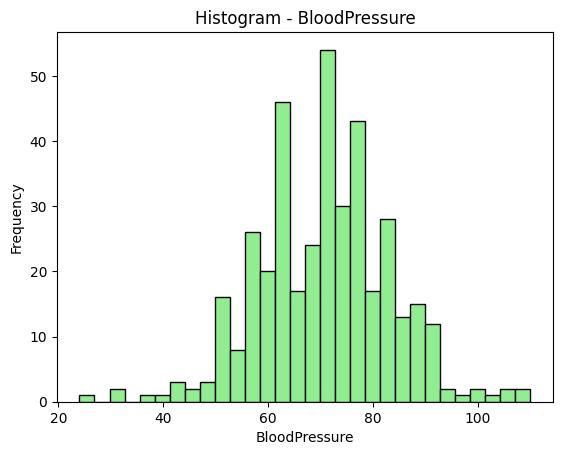

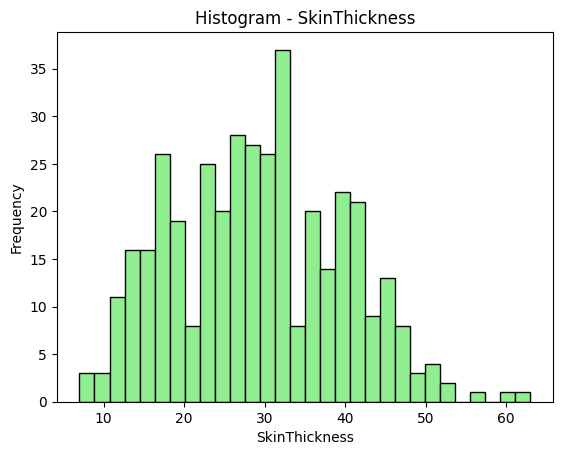

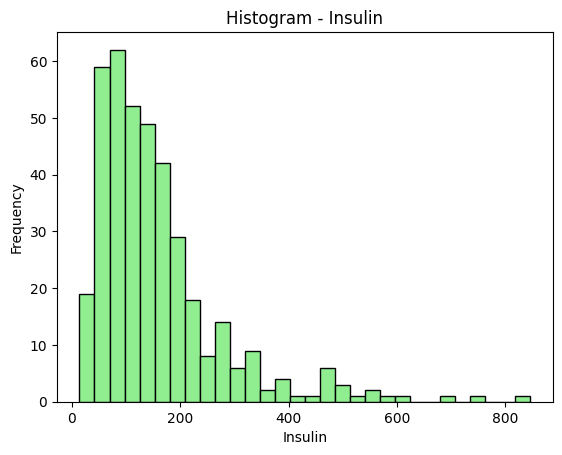

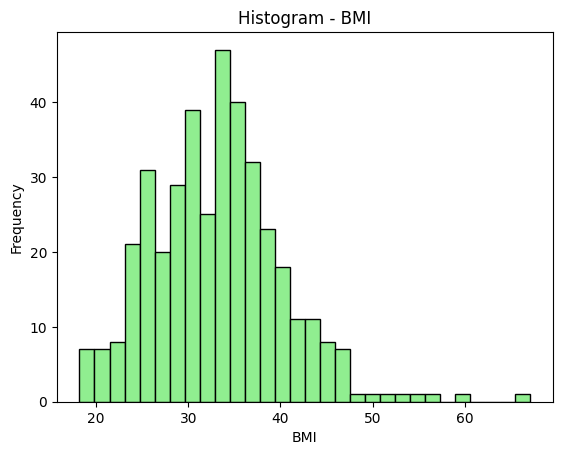

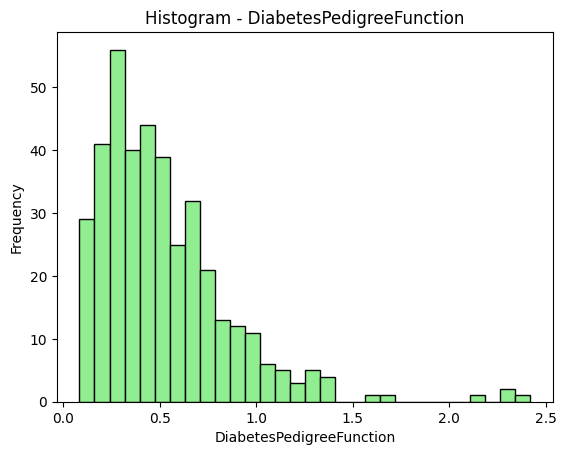

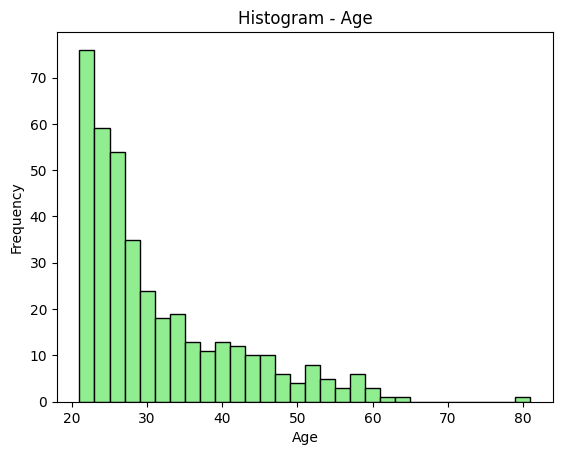

In [234]:
normality_plots(df)

<p style="font-size:20px;">Widzimy, że nasze zmienne nie mają rozkładu normalnego.</p>

In [235]:
np.set_printoptions(suppress=True) 

<h1>Dzielimy dane na 2 grupy: osoby mające cukrzycę i osoby bez cukrzycy</h1>

In [236]:
diabetes = df[df.Outcome == 1]
no_diabetes = df[df.Outcome == 0]

<h1>Test Levene'a i test t-Studenta dla kolumny <strong><em>Pregnancies</em></strong> </h1>

In [237]:
diabetes_pregnancies = diabetes['Pregnancies']
no_diabetes_pregnancies = no_diabetes['Pregnancies']

In [238]:
stat, p = levene(diabetes_pregnancies, no_diabetes_pregnancies)
print("Test Levene'a:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Levene'a:
Statystyka = 28.6528603813
P-wartość = 0.0000001481


In [239]:
t_stat, p_value = ttest_ind(diabetes_pregnancies, no_diabetes_pregnancies, equal_var=False)
mean1 = np.mean(diabetes_pregnancies)
mean2 = np.mean(no_diabetes_pregnancies)

print("Test t-Studenta:")
print(f"Statystyka t: {t_stat:.10f}")
print(f"P-wartość: {p_value:.10f}")
print(f"Średnia ilość ciąży osób chorych na cukrzycę: {mean1:.10f}")
print(f"Średnia ilość ciąży osób zdrowych: {mean2:.10f}")

Test t-Studenta:
Statystyka t: 4.6039598339
P-wartość: 0.0000076182
Średnia ilość ciąży osób chorych na cukrzycę: 4.4692307692
Średnia ilość ciąży osób zdrowych: 2.7213740458


<p style="font-size:20px;">
Widzimy, że wartość p w teście Levene'a jest mniejsza niż 0,05, więc wariancje dla zmiennej <strong><em>Pregnancies</em></strong> są różne. Dlatego w teście t-Studenta używamy <strong><em>equal_var=False</em></strong>. Wartość p w teście t-Studenta jest mniejsza niż 0,05, więc różnica między średnimi jest istotna statystycznie.
</p>

<h1>Test Levene'a i test t-Studenta dla kolumny <strong><em>Glucose</em></strong> </h1>

In [240]:
diabetes_glucose = diabetes['Glucose']
no_diabetes_glucose = no_diabetes['Glucose']

In [241]:
stat, p = levene(diabetes_glucose, no_diabetes_glucose)
print("Test Levene'a:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Levene'a:
Statystyka = 11.5608134708
P-wartość = 0.0007431046


In [242]:
t_stat, p_value = ttest_ind(diabetes_glucose, no_diabetes_glucose, equal_var=False)
mean1 = np.mean(diabetes_glucose)
mean2 = np.mean(no_diabetes_glucose)

print("Test t-Studenta:")
print(f"Statystyka t: {t_stat:.10f}")
print(f"P-wartość: {p_value:.10f}")
print(f"Średnia wartość glukozy osób chorych na cukrzycę: {mean1:.10f}")
print(f"Średnia wartość glukozy osób zdrowych: {mean2:.10f}")

Test t-Studenta:
Statystyka t: 11.1507912299
P-wartość: 0.0000000000
Średnia wartość glukozy osób chorych na cukrzycę: 145.1923076923
Średnia wartość glukozy osób zdrowych: 111.4312977099


<p style="font-size:20px;">
Widzimy, że wartość p w teście Levene'a jest mniejsza niż 0,05, więc wariancje dla zmiennej <strong><em>Glucose</em></strong> są różne. Dlatego w teście t-Studenta używamy <strong><em>equal_var=False</em></strong>. Wartość p w teście t-Studenta jest mniejsza niż 0,05, więc różnica między średnimi jest istotna statystycznie.
</p>

<h1>Test Levene'a i test t-Studenta dla kolumny <strong><em>BloodPressure</em></strong> </h1>

In [243]:
diabetes_bloodpressure = diabetes['BloodPressure']
no_diabetes_bloodpressure = no_diabetes['BloodPressure']

In [244]:
stat, p = levene(diabetes_bloodpressure, no_diabetes_bloodpressure)
print("Test Levene'a:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Levene'a:
Statystyka = 0.5761361300
P-wartość = 0.4482893337


In [245]:
t_stat, p_value = ttest_ind(diabetes_bloodpressure, no_diabetes_bloodpressure)
mean1 = np.mean(diabetes_bloodpressure)
mean2 = np.mean(no_diabetes_bloodpressure)

print("Test t-Studenta:")
print(f"Statystyka t: {t_stat:.10f}")
print(f"P-wartość: {p_value:.10f}")
print(f"Średnia wartość ciśnienia krwi osób chorych na cukrzycę: {mean1:.10f}")
print(f"Średnia wartość ciśnienia krwi osób zdrowych: {mean2:.10f}")

Test t-Studenta:
Statystyka t: 3.8776478026
P-wartość: 0.0001237479
Średnia wartość ciśnienia krwi osób chorych na cukrzycę: 74.0769230769
Średnia wartość ciśnienia krwi osób zdrowych: 68.9694656489


<p style="font-size:20px;">
Widzimy, że wartość p w teście Levene'a jest większa niż 0,05, więc wariancje dla zmiennej <strong><em>BloodPressure</em></strong> są podobne. Dlatego w teście t-Studenta nie używamy <strong><em>equal_var=False</em></strong>. Wartość p w teście t-Studenta jest mniejsza niż 0,05, więc różnica między średnimi jest istotna statystycznie.
</p>

<h1>Test Levene'a i test t-Studenta dla kolumny <strong><em>SkinThickness</em></strong> </h1>

In [246]:
diabetes_skinthickness = diabetes['SkinThickness']
no_diabetes_skinthickness = no_diabetes['SkinThickness']

In [247]:
stat, p = levene(diabetes_skinthickness, no_diabetes_skinthickness)
print("Test Levene'a:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Levene'a:
Statystyka = 2.1244432478
P-wartość = 0.1457701760


In [248]:
t_stat, p_value = ttest_ind(diabetes_skinthickness, no_diabetes_skinthickness)
mean1 = np.mean(diabetes_skinthickness)
mean2 = np.mean(no_diabetes_skinthickness)

print("Test t-Studenta:")
print(f"Statystyka t: {t_stat:.10f}")
print(f"P-wartość: {p_value:.10f}")
print(f"Średnia wartość grubości skóry osób chorych na cukrzycę: {mean1:.10f}")
print(f"Średnia wartość grubości skóry osób zdrowych: {mean2:.10f}")

Test t-Studenta:
Statystyka t: 5.2284644635
P-wartość: 0.0000002793
Średnia wartość grubości skóry osób chorych na cukrzycę: 32.9615384615
Średnia wartość grubości skóry osób zdrowych: 27.2519083969


<p style="font-size:20px;">
Widzimy, że wartość p w teście Levene'a jest większa niż 0,05, więc wariancje dla zmiennej <strong><em>SkinThickness</em></strong> są podobne. Dlatego w teście t-Studenta nie używamy <strong><em>equal_var=False</em></strong>. Wartość p w teście t-Studenta jest mniejsza niż 0,05, więc różnica między średnimi jest istotna statystycznie.
</p>

<h1>Test Levene'a i test t-Studenta dla kolumny <strong><em>Insulin</em></strong> </h1>

In [249]:
diabetes_insulin = diabetes['Insulin']
no_diabetes_insulin = no_diabetes['Insulin']

In [250]:
stat, p = levene(diabetes_insulin, no_diabetes_insulin)
print("Test Levene'a:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Levene'a:
Statystyka = 4.7765009488
P-wartość = 0.0294449084


In [251]:
t_stat, p_value = ttest_ind(diabetes_insulin, no_diabetes_insulin, equal_var=False)
mean1 = np.mean(diabetes_insulin)
mean2 = np.mean(no_diabetes_insulin)

print("Test t-Studenta:")
print(f"Statystyka t: {t_stat:.10f}")
print(f"P-wartość: {p_value:.10f}")
print(f"Średnia wartość insuliny osób chorych na cukrzycę: {mean1:.10f}")
print(f"Średnia wartość insuliny osób zdrowych: {mean2:.10f}")

Test t-Studenta:
Statystyka t: 5.7336765319
P-wartość: 0.0000000343
Średnia wartość insuliny osób chorych na cukrzycę: 206.8461538462
Średnia wartość insuliny osób zdrowych: 130.8549618321


<p style="font-size:20px;">
Widzimy, że wartość p w teście Levene'a jest mniejsza niż 0,05, więc wariancje dla zmiennej <strong><em>Insulin</em></strong> są różne. Dlatego w teście t-Studenta używamy <strong><em>equal_var=False</em></strong>. Wartość p w teście t-Studenta jest mniejsza niż 0,05, więc różnica między średnimi jest istotna statystycznie.
</p>

<h1>Test Levene'a i test t-Studenta dla kolumny <strong><em>BMI</em></strong> </h1>

In [252]:
diabetes_bmi = diabetes['BMI']
no_diabetes_bmi = no_diabetes['BMI']

In [253]:
stat, p = levene(diabetes_bmi, no_diabetes_bmi)
print("Test Levene'a:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Levene'a:
Statystyka = 2.5325054027
P-wartość = 0.1123332126


In [254]:
t_stat, p_value = ttest_ind(diabetes_bmi, no_diabetes_bmi)
mean1 = np.mean(diabetes_bmi)
mean2 = np.mean(no_diabetes_bmi)

print("Test t-Studenta:")
print(f"Statystyka t: {t_stat:.10f}")
print(f"P-wartość: {p_value:.10f}")
print(f"Średnia wartość BMI osób chorych na cukrzycę: {mean1:.10f}")
print(f"Średnia wartość BMI osób zdrowych: {mean2:.10f}")

Test t-Studenta:
Statystyka t: 5.5403624465
P-wartość: 0.0000000556
Średnia wartość BMI osób chorych na cukrzycę: 35.7776923077
Średnia wartość BMI osób zdrowych: 31.7507633588


<p style="font-size:20px;">
Widzimy, że wartość p w teście Levene'a jest większa niż 0,05, więc wariancje dla zmiennej <strong><em>BMI</em></strong> są podobne. Dlatego w teście t-Studenta nie używamy <strong><em>equal_var=False</em></strong>. Wartość p w teście t-Studenta jest mniejsza niż 0,05, więc różnica między średnimi jest istotna statystycznie.
</p>

<h1>Test Levene'a i test t-Studenta dla kolumny <strong><em>DiabetesPedigreeFunction</em></strong> </h1>

In [255]:
diabetes_diabetespedigreefunction = diabetes['DiabetesPedigreeFunction']
no_diabetes_diabetespedigreefunction = no_diabetes['DiabetesPedigreeFunction']

In [256]:
stat, p = levene(diabetes_diabetespedigreefunction, no_diabetes_diabetespedigreefunction)
print("Test Levene'a:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Levene'a:
Statystyka = 7.7975985850
P-wartość = 0.0054891581


In [257]:
t_stat, p_value = ttest_ind(diabetes_diabetespedigreefunction, no_diabetes_diabetespedigreefunction, equal_var=False)
mean1 = np.mean(diabetes_diabetespedigreefunction)
mean2 = np.mean(no_diabetes_diabetespedigreefunction)

print("Test t-Studenta:")
print(f"Statystyka t: {t_stat:.10f}")
print(f"P-wartość: {p_value:.10f}")
print(f"Średnia wartość funkcji oceniającej prawdopodobieństwo cukrzycy na podstawie historii rodziny osób chorych na cukrzycę: {mean1:.10f}")
print(f"Średnia wartość funkcji oceniającej prawdopodobieństwo cukrzycy na podstawie historii rodziny osób zdrowych: {mean2:.10f}")

Test t-Studenta:
Statystyka t: 3.8244628694
P-wartość: 0.0001748916
Średnia wartość funkcji oceniającej prawdopodobieństwo cukrzycy na podstawie historii rodziny osób chorych na cukrzycę: 0.6255846154
Średnia wartość funkcji oceniającej prawdopodobieństwo cukrzycy na podstawie historii rodziny osób zdrowych: 0.4721679389


<p style="font-size:20px;">
Widzimy, że wartość p w teście Levene'a jest mniejsza niż 0,05, więc wariancje dla zmiennej <strong><em>DiabetesPedigreeFunction</em></strong> są różne. Dlatego w teście t-Studenta używamy <strong><em>equal_var=False</em></strong>. Wartość p w teście t-Studenta jest mniejsza niż 0,05, więc różnica między średnimi jest istotna statystycznie.
</p>

<h1>Test Levene'a i test t-Studenta dla kolumny <strong><em>Age</em></strong> </h1>

In [258]:
diabetes_age = diabetes['Age']
no_diabetes_age = no_diabetes['Age']

In [259]:
stat, p = levene(diabetes_age, no_diabetes_age)
print("Test Levene'a:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Levene'a:
Statystyka = 15.1083051327
P-wartość = 0.0001192774


In [260]:
t_stat, p_value = ttest_ind(diabetes_age, no_diabetes_age, equal_var=False)
mean1 = np.mean(diabetes_age)
mean2 = np.mean(no_diabetes_age)

print("Test t-Studenta:")
print(f"Statystyka t: {t_stat:.10f}")
print(f"P-wartość: {p_value:.10f}")
print(f"Średnia wartość wieku osób chorych na cukrzycę: {mean1:.10f}")
print(f"Średnia wartość wieku osób zdrowych: {mean2:.10f}")

Test t-Studenta:
Statystyka t: 6.9929999569
P-wartość: 0.0000000000
Średnia wartość wieku osób chorych na cukrzycę: 35.9384615385
Średnia wartość wieku osób zdrowych: 28.3473282443


<p style="font-size:20px;">
Widzimy, że wartość p w teście Levene'a jest mniejsza niż 0,05, więc wariancje dla zmiennej <strong><em>Age</em></strong> są różne. Dlatego w teście t-Studenta używamy <strong><em>equal_var=False</em></strong>. Wartość p w teście t-Studenta jest mniejsza niż 0,05, więc różnica między średnimi jest istotna statystycznie.
</p>

<h1>Testy nieparametryczne - test Spearmana(badanie zależności pomiędzy zmiennymi liczbowymi)</h1>

<h1>Korelacja pomiędzy <strong><em>Pregnancies</em></strong> a <strong><em>Glucose</em></strong></h1>

In [261]:
stat, p = spearmanr(df['Pregnancies'], df['Glucose'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.1904814787
P-wartość = 0.0001481850


<p style="font-size:20px;">Zmienne są słabo, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>Pregnancies</em></strong> a <strong><em>BloodPressure</em></strong></h1>

In [262]:
stat, p = spearmanr(df['Pregnancies'], df['BloodPressure'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.1524140397
P-wartość = 0.0024805547


<p style="font-size:20px;">Zmienne są słabo, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>Pregnancies</em></strong> a <strong><em>SkinThickness</em></strong></h1>

In [263]:
stat, p = spearmanr(df['Pregnancies'], df['SkinThickness'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.0547586808
P-wartość = 0.2794676753


<p style="font-size:20px;">Brak istotnych statystycznie dowodów na korelację między zmiennymi.</p>

<h1>Korelacja pomiędzy <strong><em>Pregnancies</em></strong> a <strong><em>Insulin</em></strong></h1>

In [264]:
stat, p = spearmanr(df['Pregnancies'], df['Insulin'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.1231537066
P-wartość = 0.0146943108


<p style="font-size:20px;">Zmienne są słabo, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>Pregnancies</em></strong> a <strong><em>BMI</em></strong></h1>

In [265]:
stat, p = spearmanr(df['Pregnancies'], df['BMI'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = -0.0655514419
P-wartość = 0.1952853925


<p style="font-size:20px;">Brak istotnych statystycznie dowodów na korelację między zmiennymi.</p>

<h1>Korelacja pomiędzy <strong><em>Pregnancies</em></strong> a <strong><em>DiabetesPedigreeFunction</em></strong></h1>

In [266]:
stat, p = spearmanr(df['Pregnancies'], df['DiabetesPedigreeFunction'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.0117133501
P-wartość = 0.8171751006


<p style="font-size:20px;">Brak istotnych statystycznie dowodów na korelację między zmiennymi.</p>

<h1>Korelacja pomiędzy <strong><em>Pregnancies</em></strong> a <strong><em>Age</em></strong></h1>

In [267]:
stat, p = spearmanr(df['Pregnancies'], df['Age'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.6336565512
P-wartość = 0.0000000000


<p style="font-size:20px;">Zmienne są wysoko istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>Pregnancies</em></strong> a <strong><em>Outcome</em></strong></h1>

In [268]:
stat, p = spearmanr(df['Pregnancies'], df['Outcome'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.2002344526
P-wartość = 0.0000654402


<p style="font-size:20px;">Zmienne są słabo, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>Glucose</em></strong> a <strong><em>BloodPressure</em></strong></h1>

In [269]:
stat, p = spearmanr(df['Glucose'], df['BloodPressure'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.2366093060
P-wartość = 0.0000021680


<p style="font-size:20px;">Zmienne są słabo, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>Glucose</em></strong> a <strong><em>SkinThickness</em></strong></h1>

In [270]:
stat, p = spearmanr(df['Glucose'], df['SkinThickness'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.2158382424
P-wartość = 0.0000162778


<p style="font-size:20px;">Zmienne są słabo, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>Glucose</em></strong> a <strong><em>Insulin</em></strong></h1>

In [271]:
stat, p = spearmanr(df['Glucose'], df['Insulin'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.6589582174
P-wartość = 0.0000000000


<p style="font-size:20px;">Zmienne są wysoko istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>Glucose</em></strong> a <strong><em>BMI	</em></strong></h1>

In [272]:
stat, p = spearmanr(df['Glucose'], df['BMI'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.1990711521
P-wartość = 0.0000722924


<p style="font-size:20px;">Zmienne są słabo, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>Glucose</em></strong> a <strong><em>DiabetesPedigreeFunction</em></strong></h1>

In [273]:
stat, p = spearmanr(df['Glucose'], df['DiabetesPedigreeFunction'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.0893458140
P-wartość = 0.0772545590


<p style="font-size:20px;">Brak istotnych statystycznie dowodów na korelację między zmiennymi.</p>

<h1>Korelacja pomiędzy <strong><em>Glucose</em></strong> a <strong><em>Age</em></strong></h1>

In [274]:
stat, p = spearmanr(df['Glucose'], df['Age'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.3503047022
P-wartość = 0.0000000000


<p style="font-size:20px;">Zmienne są przeciętnie, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>Glucose</em></strong> a <strong><em>Outcome</em></strong></h1>

In [275]:
stat, p = spearmanr(df['Glucose'], df['Outcome'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.4987288997
P-wartość = 0.0000000000


<p style="font-size:20px;">Zmienne są przeciętnie, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>BloodPressure</em></strong> a <strong><em>SkinThickness</em></strong></h1>

In [276]:
stat, p = spearmanr(df['BloodPressure'], df['SkinThickness'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.2501061823
P-wartość = 0.0000005277


<p style="font-size:20px;">Zmienne są słabo, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>BloodPressure</em></strong> a <strong><em>Insulin</em></strong></h1>

In [277]:
stat, p = spearmanr(df['BloodPressure'], df['Insulin'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.1316389459
P-wartość = 0.0090711929


<p style="font-size:20px;">Zmienne są słabo, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>BloodPressure</em></strong> a <strong><em>BMI</em></strong></h1>

In [278]:
stat, p = spearmanr(df['BloodPressure'], df['BMI'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.3174274748
P-wartość = 0.0000000001


<p style="font-size:20px;">Zmienne są przeciętnie, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>BloodPressure</em></strong> a <strong><em>DiabetesPedigreeFunction</em></strong></h1>

In [279]:
stat, p = spearmanr(df['BloodPressure'], df['DiabetesPedigreeFunction'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = -0.0208919435
P-wartość = 0.6800730508


<p style="font-size:20px;">Brak istotnych statystycznie dowodów na korelację między zmiennymi.</p>

<h1>Korelacja pomiędzy <strong><em>BloodPressure</em></strong> a <strong><em>Age</em></strong></h1>

In [280]:
stat, p = spearmanr(df['BloodPressure'], df['Age'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.3292440779
P-wartość = 0.0000000000


<p style="font-size:20px;">Zmienne są przeciętnie, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>BloodPressure</em></strong> a <strong><em>Outcome</em></strong></h1>

In [281]:
stat, p = spearmanr(df['BloodPressure'], df['Outcome'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.1981265677
P-wartość = 0.0000783479


<p style="font-size:20px;">Zmienne są słabo, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>SkinThickness</em></strong> a <strong><em>Insulin</em></strong></h1>

In [282]:
stat, p = spearmanr(df['SkinThickness'], df['Insulin'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.2411449894
P-wartość = 0.0000013609


<p style="font-size:20px;">Zmienne są słabo, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>SkinThickness</em></strong> a <strong><em>BMI</em></strong></h1>

In [283]:
stat, p = spearmanr(df['SkinThickness'], df['BMI'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.6743929277
P-wartość = 0.0000000000


<p style="font-size:20px;">Zmienne są wysoko istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>SkinThickness</em></strong> a <strong><em>DiabetesPedigreeFunction</em></strong></h1>

In [284]:
stat, p = spearmanr(df['SkinThickness'], df['DiabetesPedigreeFunction'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.0930494687
P-wartość = 0.0657100019


<p style="font-size:20px;">Brak istotnych statystycznie dowodów na korelację między zmiennymi.</p>

<h1>Korelacja pomiędzy <strong><em>SkinThickness</em></strong> a <strong><em>Age</em></strong></h1>

In [285]:
stat, p = spearmanr(df['SkinThickness'], df['Age'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.2415067207
P-wartość = 0.0000013107


<p style="font-size:20px;">Zmienne są słabo, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>SkinThickness</em></strong> a <strong><em>Outcome</em></strong></h1>

In [286]:
stat, p = spearmanr(df['SkinThickness'], df['Outcome'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.2601534348
P-wartość = 0.0000001746


<p style="font-size:20px;">Zmienne są słabo, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>Insulin</em></strong> a <strong><em>BMI</em></strong></h1>

In [287]:
stat, p = spearmanr(df['Insulin'], df['BMI'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.3009060840
P-wartość = 0.0000000012


<p style="font-size:20px;">Zmienne są przeciętnie, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>Insulin</em></strong> a <strong><em>DiabetesPedigreeFunction</em></strong></h1>

In [288]:
stat, p = spearmanr(df['Insulin'], df['DiabetesPedigreeFunction'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.1315152978
P-wartość = 0.0091369546


<p style="font-size:20px;">Zmienne są słabo, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>Insulin</em></strong> a <strong><em>Age</em></strong></h1>

In [289]:
stat, p = spearmanr(df['Insulin'], df['Age'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.2607474253
P-wartość = 0.0000001633


<p style="font-size:20px;">Zmienne są słabo, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>Insulin</em></strong> a <strong><em>Outcome</em></strong></h1>

In [290]:
stat, p = spearmanr(df['Insulin'], df['Outcome'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.3750194935
P-wartość = 0.0000000000


<p style="font-size:20px;">Zmienne są przeciętnie, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>BMI</em></strong> a <strong><em>DiabetesPedigreeFunction</em></strong></h1>

In [291]:
stat, p = spearmanr(df['BMI'], df['DiabetesPedigreeFunction'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.0962424203
P-wartość = 0.0569311438


<p style="font-size:20px;">Brak istotnych statystycznie dowodów na korelację między zmiennymi.</p>

<h1>Korelacja pomiędzy <strong><em>BMI</em></strong> a <strong><em>Age</em></strong></h1>

In [292]:
stat, p = spearmanr(df['BMI'], df['Age'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.1669628955
P-wartość = 0.0009051438


<p style="font-size:20px;">Zmienne są słabo, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>BMI</em></strong> a <strong><em>Outcome</em></strong></h1>

In [293]:
stat, p = spearmanr(df['BMI'], df['Outcome'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.2670771707
P-wartość = 0.0000000793


<p style="font-size:20px;">Zmienne są słabo, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>DiabetesPedigreeFunction</em></strong> a <strong><em>Age</em></strong></h1>

In [294]:
stat, p = spearmanr(df['DiabetesPedigreeFunction'], df['Age'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.1029841163
P-wartość = 0.0415607990


<p style="font-size:20px;">Zmienne są słabo, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>DiabetesPedigreeFunction</em></strong> a <strong><em>Outcome</em></strong></h1>

In [295]:
stat, p = spearmanr(df['DiabetesPedigreeFunction'], df['Outcome'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.1982135354
P-wartość = 0.0000777711


<p style="font-size:20px;">Zmienne są słabo, ale istotnie dodatnio skorelowane.</p>

<h1>Korelacja pomiędzy <strong><em>Age</em></strong> a <strong><em>Outcome</em></strong></h1>

In [296]:
stat, p = spearmanr(df['Age'], df['Outcome'])
print("Test Spearmana:")
print(f"Statystyka = {stat:.10f}")
print(f"P-wartość = {p:.10f}")

Test Spearmana:
Statystyka = 0.3973547357
P-wartość = 0.0000000000


<p style="font-size:20px;">Zmienne są przeciętnie, ale istotnie dodatnio skorelowane.</p>

<h1>Podsumowanie testów nieparametrycznych - test Spearmana</h1>
<p style="font-size:20px;">Widzimy, że najwyższa korelacja występuje pomiędzy <strong><em>SkinThickness</em></strong> a <strong><em>BMI</em></strong> oraz <strong><em>Glucose</em></strong> a <strong><em>Insulin</em></strong></p>
<p style="font-size:20px;">Nieskorelowane są natomiast <strong><em>DiabetesPedigreeFunction</em></strong> z <strong><em>BMI</em></strong>,  <strong><em>DiabetesPedigreeFunction</em></strong> z <strong><em>SkinThickness</em></strong>, <strong><em>DiabetesPedigreeFunction</em></strong> z <strong><em>BloodPressure</em></strong>, <strong><em>DiabetesPedigreeFunction</em></strong> z <strong><em>Glucose</em></strong>, <strong><em>DiabetesPedigreeFunction</em></strong> z <strong><em>Pregnancies</em></strong> oraz <strong><em>Pregnancies</em></strong> z <strong><em>SkinThickness</em></strong>.</p>